In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


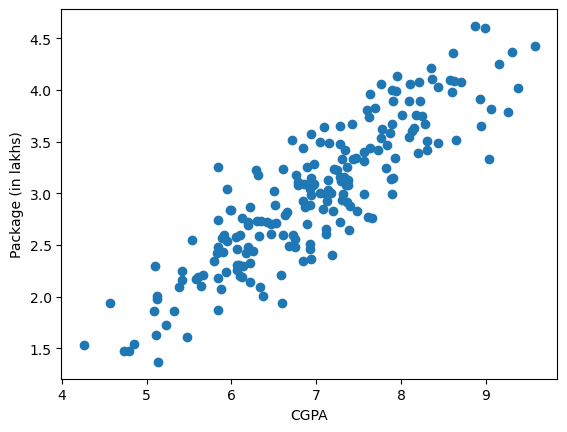

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package (in lakhs)")
plt.show()

In [5]:
# Now separating the input and the output columns 
X = df.iloc[:,0:1]
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [6]:
Y = df.iloc[:,-1]    # the target column or the output variable/dependent variable
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
#Randomly dividing the training and the testing set. 
# using sklearn library's class train_test_split 


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y, test_size=0.2,random_state=2)

In [9]:
# using sklearn.linear_model's LinearRegression class
from sklearn.linear_model import LinearRegression

In [10]:
# then making an object lr out of LinearRegression

lr = LinearRegression()

In [11]:
#now this method has some attributes or methods, we need to use "fit" here, to train the model using the X_train & Y_train
lr.fit(X_train,Y_train)

LinearRegression()

In [12]:
X_train.head()

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77


In [29]:
#Now we're ready to predict 

X_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [30]:
Y_test.head()

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
Name: package, dtype: float64

In [16]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [22]:
lr.predict(X_test.iloc[[0]]) # use this instead of reshaping the values

array([3.89111601])

In [23]:
# now i'll give 8.58 cgpa to my model and find out how close its giving the cgpa from the actual data
lr.predict(X_test.iloc[[0]].values.reshape(1,1))  # output for 112, cgpa 8.58)


array([3.89111601])

In [24]:
lr.predict(X_test.iloc[1].values.reshape(1,1))  # output for 29, cgpa 7.15, )

array([3.09324469])

In [19]:
lr.predict(X_test.iloc[2].values.reshape(1,1)) 

array([2.38464568])

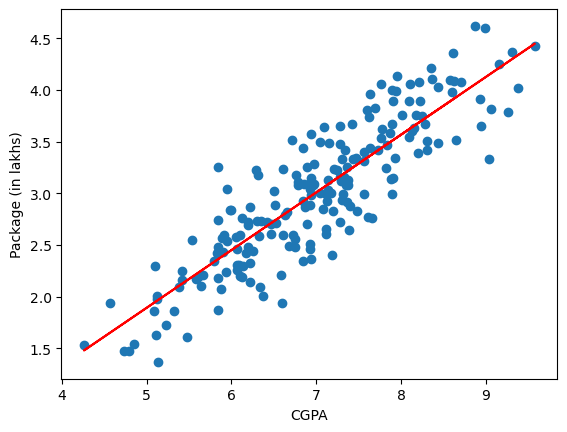

In [38]:
#checking the line that out LR model drew
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='Red')
plt.xlabel("CGPA")
plt.ylabel("Package (in lakhs)")
plt.show()

In [41]:
#Checking the slope and y-intecept value of the regression line
# using the coefficient attribute from lr slope
m = lr.coef_
m

array([0.55795197])

In [45]:
c = lr.intercept_
c

-0.8961119222429144

In [48]:
# now y = mx+c : On giving a new x, a new y value will be intoduced
#Cross checking for 8.58 cgpa
# y = mx+c
0.56*8.58 + (-0.9)

3.9048000000000003

In [49]:
# trying new cgpa 
0.56* 9  + (-0.9)

4.140000000000001